# Simple and Secure Image Steganography using LSB and Triple XOR Operation on MSB

_**Abstract**—Least Significant Bit (LSB) is a very popular method
in the spatial domain of steganographic images. This method is
widely used and continues to be developed to date, because of its
advantages in steganographic image quality. However, the
traditional LSB method is very simple and predictable. It needs a
way to improve the security of hidden messages in this way. This
research proposes a simple and safe way to hide messages in LSB
techniques. Three times the XOR operation is done to encrypt the
message before it is embedded on the LSB. To facilitate the process
of encryption and decryption of messages, three MSB bits are used
as keys in XOR operations. The results of this study prove that this
method provides security to messages with very simple operation.
The imperceptibility quality of the stego image is also excellent
with a PSNR value above 50 dB._

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Embedding Scheme
![embedding.PNG](pics/embedding.PNG)

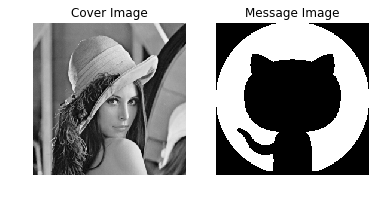

In [2]:
# step 1: read the cover image and message image
c_img = cv2.imread("lena.png", 0)
c_img = cv2.resize(c_img, (256, 256))

m_img = cv2.imread("git.png", 0)
m_img = cv2.resize(m_img, (256, 256))
m_img[m_img>0] = 1

plt.subplot(121)
plt.axis("off")
plt.title("Cover Image")
plt.imshow(c_img, cmap="gray")

plt.subplot(122)
plt.axis("off")
plt.title("Message Image")
plt.imshow(m_img, cmap="gray")

plt.show()

In [3]:
c_flatten = c_img.flatten()
m_flatten = m_img.flatten()

print(c_flatten.shape)
print(m_flatten.shape)

(65536,)
(65536,)


In [4]:
out = []
for a, b in zip(c_flatten, m_flatten):
    a = np.binary_repr(a, width=8)

    # step 3: perform XOR operations on the 7th and on the 6th bit    
    xor_a = int(a[1]) ^ int(a[2])
    
    # step 4: perform XOR operations on 8th bit with xor_a
    xor_b = int(a[0]) ^ xor_a
    
    # step 5: perform XOR operations on message bits with 3 MSB
    xor_c = int(b) ^ xor_b 
    
    # step 6: save xor_c, convert back to uint8
    save = a[:-1] + str(xor_c)
    
    # https://stackoverflow.com/questions/8928240/convert-base-2-binary-number-string-to-int
    out.append(int(save, 2))

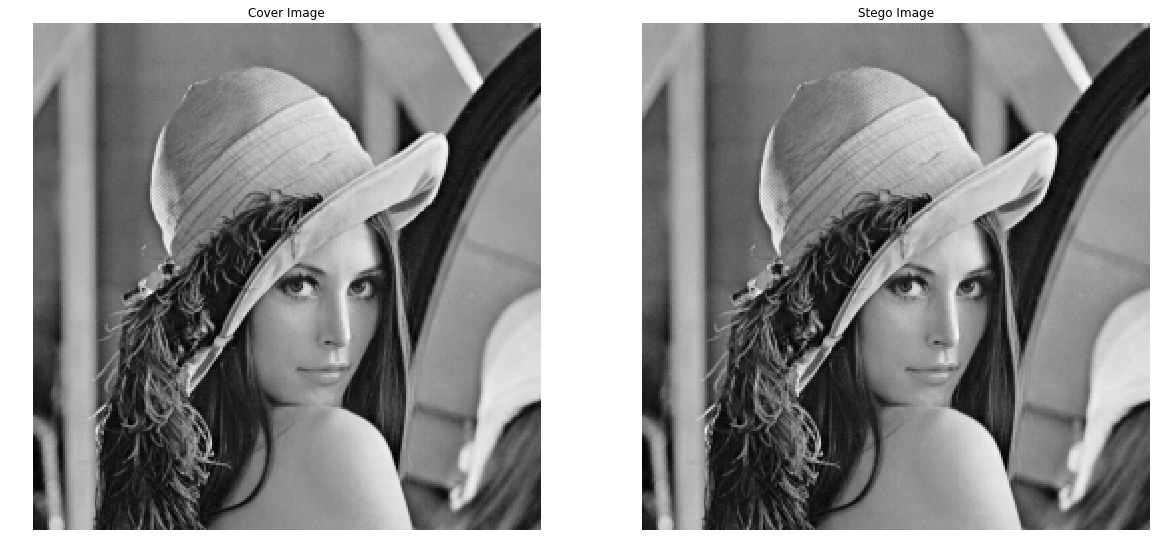

In [5]:
stego_img = np.array(out)
stego_img = np.reshape(stego_img, (256, 256))

plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Cover Image")
plt.axis("off")
plt.imshow(c_img, cmap="gray")

plt.subplot(122)
plt.title("Stego Image")
plt.axis("off")
plt.imshow(stego_img, cmap="gray")

plt.show()

## Extraction Scheme
![extraction.PNG](pics/extraction.PNG)

In [6]:
# step 1: read stego image
stego_img = cv2.imread("stego.png", 0)
stego_flatten = stego_img.flatten()

In [7]:
out = []
for x in stego_flatten:
    # step 2: change pixel value to binary
    x = np.binary_repr(x, width=8)

    # step 3: perform XOR on 7th and 6th bits
    xor_a = int(x[1]) ^ int(x[2])
    
    # step 4: perform XOR operation on 8th bit with xor_a
    xor_b = int(x[0]) ^ xor_a
    
    # step 5: perform XOR operations on message bits with 3 MSB
    xor_c = int(x[-1]) ^ xor_b
    
    out.append(int(xor_c))

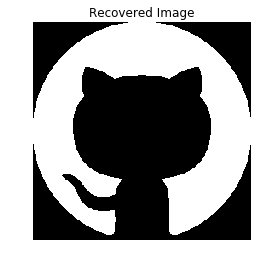

In [8]:
recover_img = np.reshape(np.array(out), (256,256))
recover_img[recover_img==1] = 255

plt.title("Recovered Image")
plt.axis("off")
plt.imshow(recover_img, cmap="gray")
plt.show()

## Histogram Analysis

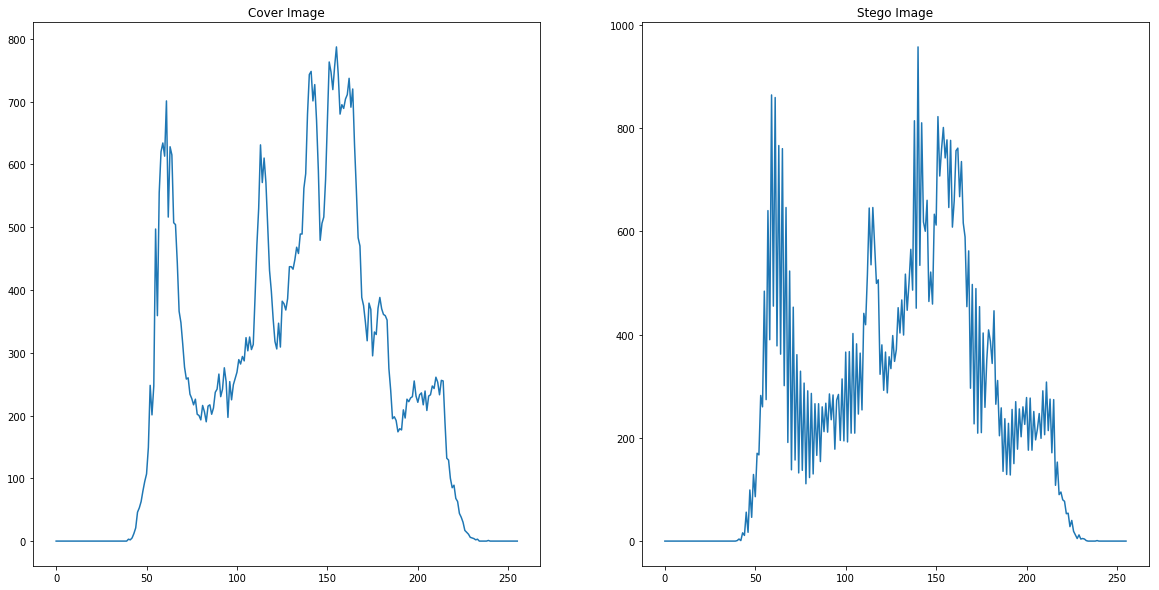

In [9]:
hist_cover = cv2.calcHist([c_img], [0], None, [256], [0, 256])
hist_stego = cv2.calcHist([stego_img], [0], None, [256], [0, 256])

plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Cover Image")
plt.plot(hist_cover)

plt.subplot(122)
plt.title("Stego Image")
plt.plot(hist_stego)

plt.show()

In [10]:
# https://stackoverflow.com/questions/44902410/python-opencv-3-how-to-use-cv2-cv-comp-hellinger

methods = (("Correlation", cv2.HISTCMP_CORREL), ("Chi-Squared", cv2.HISTCMP_CHISQR), ("Intersection", cv2.HISTCMP_INTERSECT),
          ("Hellinger", cv2.HISTCMP_HELLINGER))

for name, method in methods:
    compare = cv2.compareHist(hist_cover, hist_stego, method)
    ideal = cv2.compareHist(hist_cover, hist_cover, method)
    print("{}: {} ({})".format(name, compare, ideal))

Correlation: 0.9545555173625555 (1.0)
Chi-Squared: 3414.400127011103 (0.0)
Intersection: 59640.0 (65536.0)
Hellinger: 0.08223351054755815 (0.0)
